In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.naver.linewebtoon',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi webtoon yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=5000, # disini jumlah ulasan yang mau kita ambil ada limaribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b8e2b827-cfee-4052-aa06-7428def39a04,hestina irma,https://play-lh.googleusercontent.com/a/ACg8oc...,"Teruntuk apk ini sangat bagus sekali, saat say...",5,249,3.1.0,2023-10-17 05:13:19,None,NaT,3.1.0
1,7f9ffff7-72d5-45af-adf8-595cfa1cc918,Viiraaww,https://play-lh.googleusercontent.com/a-/ALV-U...,"overall bagus bgt aplikasinya, recommend buat ...",3,403,3.0.8,2023-09-06 13:49:52,None,NaT,3.0.8
2,ba25a710-e760-49b6-b927-4151375feb1c,Fitri Ayu,https://play-lh.googleusercontent.com/a-/ALV-U...,"webtoon, aku sudah suka semua komikmu bertahun...",4,204,3.1.1,2023-10-22 16:02:36,None,NaT,3.1.1
3,2d83a4c7-d282-4218-b08c-2afe49f6d687,Aditiya Bima,https://play-lh.googleusercontent.com/a-/ALV-U...,Untuk developer line webtoon. Aplikasi ini san...,2,218,3.1.0,2023-09-24 05:53:18,None,NaT,3.1.0
4,1d2e1af5-62a1-47b6-bbf7-546474a77999,Indra Muliana,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya kurang suka dengan versi Webtoon sekarang...,2,378,3.0.9,2023-09-27 02:10:13,None,NaT,3.0.9


In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
1625,Aufa khanza Hadistia,1,2023-11-17 23:35:31,Wah pemerasan. Aku beli koin gak terisi. Giman...
702,Ihacoyy,3,2023-11-17 13:17:56,Bagus si tapi ga gratis semua
681,Alya Anggita,5,2023-11-17 12:57:56,cerita nya semua menarik
1609,Naura Teheng,5,2023-11-17 10:30:34,"sukaa, yg tdinya mles bca jdi suka baca lovv"
37,Tri Melati,4,2023-11-17 08:00:53,bagus banget cuma bosen aja komiknya kebanyaka...


In [ ]:
my_df=sorted_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.
print(my_df)

                                                content  score
1625  Wah pemerasan. Aku beli koin gak terisi. Giman...      1
702                       Bagus si tapi ga gratis semua      3
681                            cerita nya semua menarik      5
1609       sukaa, yg tdinya mles bca jdi suka baca lovv      5
37    bagus banget cuma bosen aja komiknya kebanyaka...      4
...                                                 ...    ...
2311  Saya sudah lama di webtoon.. Tp sering sekali ...      1
2606  Saran aja, kalo bisa app nya bisa dipindahkan ...      3
3468  Bagus banget seru dan menarik tapi sayang , ch...      5
1762  Mantep banget dah di komik. Gampang dicerna, c...      5
2318  Gw suka banget sama ni komik.. sayangnya komik...      5

[5000 rows x 2 columns]


#**Pelabelan Data**

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-32-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
1625,Wah pemerasan. Aku beli koin gak terisi. Giman...,1,Negatif
702,Bagus si tapi ga gratis semua,3,Netral
681,cerita nya semua menarik,5,Positif
1609,"sukaa, yg tdinya mles bca jdi suka baca lovv",5,Positif
37,bagus banget cuma bosen aja komiknya kebanyaka...,4,Positif
138,Aplikasi bagus untuk mengisi waktu luang kuali...,5,Positif
514,sudah bagus sih tpi knp harus make koiin segala,3,Netral
1640,saya sangat menyukai novel yang ada di aplikasi,5,Positif
400,"seru bangwtt aslii ! kalian harus download , c...",5,Positif
3448,aaaa bagus bangettt sukakkkk,5,Positif


In [ ]:
my_df.to_excel("scrapping_data_webtoon.xlsx", index = False)  #kemudian save menjadi file csv

                                             content  score    Label
0  Wah pemerasan. Aku beli koin gak terisi. Giman...      1  Negatif
1                      Bagus si tapi ga gratis semua      3   Netral
2                           cerita nya semua menarik      5  Positif
3       sukaa, yg tdinya mles bca jdi suka baca lovv      5  Positif
4  bagus banget cuma bosen aja komiknya kebanyaka...      4  Positif


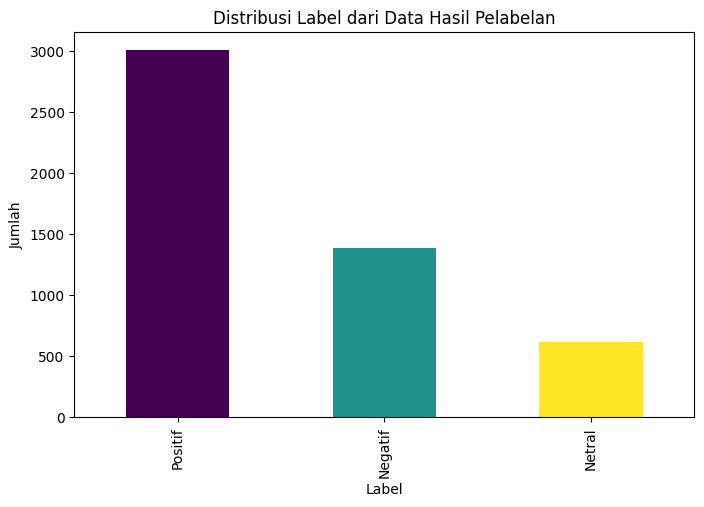

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file Excel
file_path = 'scrapping_data_webtoon.xlsx'
my_df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama data untuk memastikan pembacaan berhasil
print(my_df.head())

# Menentukan warna yang berbeda untuk setiap kategori atau label
colors = plt.cm.viridis(np.linspace(0, 1, len(my_df['Label'].unique())))

# Menggunakan matplotlib untuk membuat diagram batang
plt.figure(figsize=(8, 5))   # Menetapkan ukuran gambar

# Menghitung jumlah data untuk setiap label
label_counts = my_df['Label'].value_counts()

# Membuat diagram batang dengan warna yang berbeda
label_counts.plot(kind='bar', color=colors)

# Menambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Label dari Data Hasil Pelabelan')

# Menampilkan diagram
plt.show()

In [ ]:
!pip install nltk
!pip install sastrawi
!pip install emoji

In [ ]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Load data from Excel file
file_path = 'scrapping_data_webtoon.xlsx'
my_df = pd.read_excel(file_path)

In [ ]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

my_df['content'] = my_df['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
print(my_df.head(50))

Hasil Cleaning: 

                                              content  score    Label
0   Wah pemerasan Aku beli koin gak terisi Gimana ...      1  Negatif
1                       Bagus si tapi ga gratis semua      3   Netral
2                            cerita nya semua menarik      5  Positif
3         sukaa yg tdinya mles bca jdi suka baca lovv      5  Positif
4   bagus banget cuma bosen aja komiknya kebanyaka...      4  Positif
5   Aplikasi bagus untuk mengisi waktu luang kuali...      5  Positif
6     sudah bagus sih tpi knp harus make koiin segala      3   Netral
7     saya sangat menyukai novel yang ada di aplikasi      5  Positif
8   seru bangwtt aslii kalian harus download cocok...      5  Positif
9                        aaaa bagus bangettt sukakkkk      5  Positif
10  aplikasinya sangat bagus karena banyak sekali ...      5  Positif
11  Koin saya beli kok belum masuk yaa Tolong perb...      2  Negatif
12     Bagusbagus ceritanyacocok untuk yg dirumah aja      5  Positif
13

In [ ]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
print(my_df.head(50))

Hasil Case Folding: 

                                              content  score    Label
0   wah pemerasan aku beli koin gak terisi gimana ...      1  Negatif
1                       bagus si tapi ga gratis semua      3   Netral
2                            cerita nya semua menarik      5  Positif
3         sukaa yg tdinya mles bca jdi suka baca lovv      5  Positif
4   bagus banget cuma bosen aja komiknya kebanyaka...      4  Positif
5   aplikasi bagus untuk mengisi waktu luang kuali...      5  Positif
6     sudah bagus sih tpi knp harus make koiin segala      3   Netral
7     saya sangat menyukai novel yang ada di aplikasi      5  Positif
8   seru bangwtt aslii kalian harus download cocok...      5  Positif
9                        aaaa bagus bangettt sukakkkk      5  Positif
10  aplikasinya sangat bagus karena banyak sekali ...      5  Positif
11  koin saya beli kok belum masuk yaa tolong perb...      2  Negatif
12     bagusbagus ceritanyacocok untuk yg dirumah aja      5  Positi

In [ ]:
my_df.to_excel('cleaning.xlsx', index=False)

data_fold = pd.read_excel('cleaning.xlsx')
print(data_fold.shape)
print(data_fold.head())

(5000, 3)
                                             content  score    Label
0  wah pemerasan aku beli koin gak terisi gimana ...      1  Negatif
1                      bagus si tapi ga gratis semua      3   Netral
2                           cerita nya semua menarik      5  Positif
3        sukaa yg tdinya mles bca jdi suka baca lovv      5  Positif
4  bagus banget cuma bosen aja komiknya kebanyaka...      4  Positif


In [ ]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0   [wah, pemerasan, aku, beli, koin, gak, terisi,...      1  Negatif
1                [bagus, si, tapi, ga, gratis, semua]      3   Netral
2                       [cerita, nya, semua, menarik]      5  Positif
3   [sukaa, yg, tdinya, mles, bca, jdi, suka, baca...      5  Positif
4   [bagus, banget, cuma, bosen, aja, komiknya, ke...      4  Positif
5   [aplikasi, bagus, untuk, mengisi, waktu, luang...      5  Positif
6   [sudah, bagus, sih, tpi, knp, harus, make, koi...      3   Netral
7   [saya, sangat, menyukai, novel, yang, ada, di,...      5  Positif
8   [seru, bangwtt, aslii, kalian, harus, download...      5  Positif
9                   [aaaa, bagus, bangettt, sukakkkk]      5  Positif
10  [aplikasinya, sangat, bagus, karena, banyak, s...      5  Positif
11  [koin, saya, beli, kok, belum, masuk, yaa, tol...      2  Negatif
12  [bagusbagus, ceritanyacocok, untuk, yg, diruma...      5  Positif


In [ ]:
my_df.to_excel('tokenizing.xlsx', index=False)


data_token = pd.read_excel("tokenizing.xlsx")
print(data_token.shape)
print(data_token.head())

(5000, 3)
                                             content  score    Label
0  ['wah', 'pemerasan', 'aku', 'beli', 'koin', 'g...      1  Negatif
1   ['bagus', 'si', 'tapi', 'ga', 'gratis', 'semua']      3   Netral
2              ['cerita', 'nya', 'semua', 'menarik']      5  Positif
3  ['sukaa', 'yg', 'tdinya', 'mles', 'bca', 'jdi'...      5  Positif
4  ['bagus', 'banget', 'cuma', 'bosen', 'aja', 'k...      4  Positif


In [ ]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0   [pemerasan, beli, koin, terisi, gimana, tolong...      1  Negatif
1                                     [bagus, gratis]      3   Netral
2                                   [cerita, menarik]      5  Positif
3   [sukaa, tdinya, mles, bca, jdi, suka, baca, lovv]      5  Positif
4   [bagus, bosen, komiknya, kebanyakan, cerita, r...      4  Positif
5   [aplikasi, bagus, mengisi, luang, kualitas, ga...      5  Positif
6                           [bagus, knp, make, koiin]      3   Netral
7                         [menyukai, novel, aplikasi]      5  Positif
8   [seru, bangwtt, aslii, cocok, dibaca, gabudd, ...      5  Positif
9                   [aaaa, bagus, bangettt, sukakkkk]      5  Positif
10       [aplikasinya, bagus, komik, novel, tersedia]      5  Positif
11             [koin, beli, masuk, tolong, perbaikan]      2  Negatif
12              [bagusbagus, ceritanyacocok, dirumah]      5  Positif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
my_df.to_excel('stopword.xlsx', index=False)

data_filter = pd.read_excel("stopword.xlsx")
print(data_filter.shape)
print(data_filter.head())

(5000, 3)
                                             content  score    Label
0  ['pemerasan', 'beli', 'koin', 'terisi', 'giman...      1  Negatif
1                                ['bagus', 'gratis']      3   Netral
2                              ['cerita', 'menarik']      5  Positif
3  ['sukaa', 'tdinya', 'mles', 'bca', 'jdi', 'suk...      5  Positif
4  ['bagus', 'bosen', 'komiknya', 'kebanyakan', '...      4  Positif


In [ ]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
print(my_df['content'].head())

0    [peras, beli, koin, isi, gimana, tolong, kemba...
1                                      [bagus, gratis]
2                                      [cerita, tarik]
3    [sukaa, tdinya, mles, bca, jdi, suka, baca, lovv]
4    [bagus, bosen, komik, banyak, cerita, romance,...
Name: content, dtype: object


In [ ]:
my_df.to_excel('final.xlsx', index=False)

datafinal = pd.read_excel("final.xlsx")
print(datafinal.shape)
print(datafinal.head())

(5000, 3)
                                             content  score    Label
0  ['peras', 'beli', 'koin', 'isi', 'gimana', 'to...      1  Negatif
1                                ['bagus', 'gratis']      3   Netral
2                                ['cerita', 'tarik']      5  Positif
3  ['sukaa', 'tdinya', 'mles', 'bca', 'jdi', 'suk...      5  Positif
4  ['bagus', 'bosen', 'komik', 'banyak', 'cerita'...      4  Positif


In [ ]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

       aa  aaa  aaaa  aaaaa  aaaaaaaaaaazzzzzzzzzzz  aaaaarrgghh  aaaaaseneng  \
0     0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
1     0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
2     0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
3     0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
4     0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
...   ...  ...   ...    ...                     ...          ...          ...   
4995  0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
4996  0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
4997  0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
4998  0.0  0.0   0.0    0.0                     0.0          0.0          0.0   
4999  0.0  0.0   0.0    0.0                     0.0          0.0          0.0   

      aaaakuh  aaah  aaasss

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("final.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.738
Presisi (80:20): 0.7155897729436722
Recall (80:20): 0.738
F1 Score (80:20): 0.6995699701730266

Random Forest:
Akurasi (80:20): 0.705
Presisi (80:20): 0.7312353393874096
Recall (80:20): 0.705
F1 Score (80:20): 0.6615201195906728
